<a href="https://colab.research.google.com/github/burakemretetik/regression/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Liear Regression

With few and basic data

In [ ]:
# Gerekli kütüphaneleri içe aktar
import numpy as np  # Matematiksel işlemler için
import matplotlib.pyplot as plt  # Grafik çizimleri için

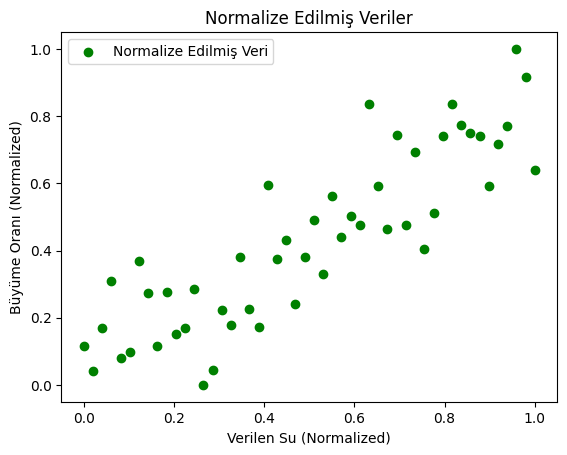

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Adım 1: Sentetik Veri Oluştur
np.random.seed(42)  # Rastgelelik için seed belirle (her seferinde aynı sonuçlar için)
x_i = np.linspace(50, 500, 50).reshape(-1, 1)  # 50 ile 500 arasında 50 eşit aralıklı değer oluştur
y_i = 0.02 * x_i.flatten() + np.random.normal(scale=1.5, size=x_i.shape[0])  # Doğrusal ilişki + gürültü ekle

# Adım 3: Veriyi Standartlaştırma
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_i)
y_scaled = scaler.fit_transform(y_i.reshape(-1, 1)).flatten()

# Adım 5: Veriyi Normalize Etme
scaler_minmax = MinMaxScaler()
x_normalized = scaler_minmax.fit_transform(x_i)
y_normalized = scaler_minmax.fit_transform(y_i.reshape(-1, 1)).flatten()

# Adım 6: Veriyi Görselleştir (Normalize Edilmiş Veri)
plt.scatter(x_normalized, y_normalized, color='green', label='Normalize Edilmiş Veri')  # Normalize edilmiş veri
plt.xlabel('Verilen Su (Normalized)')  # X ekseni etiketi
plt.ylabel('Büyüme Oranı (Normalized)')  # Y ekseni etiketi
plt.title('Normalize Edilmiş Veriler')  # Grafik başlığı
plt.legend()
plt.show()


# ----------------------------------------------------------------------------

In [ ]:
# İstatistiksel Model: y_i = β₀ + β₁*x_i + e_i
"""
Bu model, bağımlı değişken (y_i) ile bağımsız değişken (x_i) arasındaki doğrusal ilişkiyi açıklar.
- y_i: Bağımlı değişken (örneğin, bitkinin büyüme oranı)
- x_i: Bağımsız değişken (örneğin, verilen su miktarı)
- β₀: Kesim noktası (bilinmeyen sabit)
- β₁: Eğim (bilinmeyen sabit)
- e_i: Hata terimi (rastgele hata)
"""

# x_i Bilinen Sabitlerdir
"""
x_i değerleri, deney tasarımı tarafından belirlenmiş bilinen sabitlerdir.
Örneğin, bitkilere verilen su miktarı (x_i) önceden belirlenmiştir.
"""

# β₀ ve β₁ Bilinmeyen Sabitlerdir
"""
β₀ ve β₁, modelin bilinmeyen parametreleridir. Bu parametreler, veri kullanılarak tahmin edilir.
"""

# e_i: Hata Terimi
"""
e_i, modelin tahminlerindeki rastgele hatayı temsil eder.
- e_i, bağımsız rastgele değişkendir.
- Her bir e_i için beklenen değer (E(e_i)) = 0'dır.
- Her bir e_i için varyans (Var(e_i)) = σ²'dir.
"""

# y_i'nin Beklenen Değeri ve Varyansı
"""
- y_i'nin beklenen değeri: E(y_i) = β₀ + β₁*x_i
- y_i'nin varyansı: Var(y_i) = Var(e_i) = σ²
  - Bu, y_i'nin varyansının X_i'den bağımsız olduğunu gösterir.
"""

# Teorik Model: μ y|x = β₀ + β₁*x_i
"""
Teorik model, y_i'nin koşullu beklenen değerini (μ y|x) ifade eder.
Bu, x_i verildiğinde y_i'nin beklenen değeridir.
"""

# Fitted Model (Uyumlanmış Model): ŷ_i = b₀ + b₁*X_i
"""
Uyumlanmış model, veri kullanılarak tahmin edilen regresyon doğrusunu ifade eder.
- ŷ_i: Tahmin edilen y_i değeri
- b₀: Tahmin edilen kesim noktası
- b₁: Tahmin edilen eğim
"""

'\nUyumlanmış model, veri kullanılarak tahmin edilen regresyon doğrusunu ifade eder.\n- ŷ_i: Tahmin edilen y_i değeri\n- b₀: Tahmin edilen kesim noktası\n- b₁: Tahmin edilen eğim\n'

In [ ]:
# Adım 1: Hata Terimlerini ve Kareler Toplamını Anlama
"""
Biz (y_i - ŷ_i) değerlerinin her biri için küçük olmasını istiyoruz.
Bu, tahmin hatalarının küçük olması anlamına gelir.
Ayrıca, bu hataların karelerinin toplamını (Z(y_i - ŷ_i)^2) mümkün olduğunca küçük yapmak istiyoruz.
Bu, en küçük kareler yönteminin temelidir.
"""

# Adım 2: Regresyon Modeli ve Hata Terimi
"""
Regresyon modeli: y_i = β₀ + β₁*x_i + e_i

Burada:
- y_i: Bağımlı değişken (gözlemlenen değer)
- β₀: Kesim noktası (intercept)
- β₁: Eğim (slope)
- x_i: Bağımsız değişken
- e_i: Hata terimi

Hata terimi (e_i) şu şekilde hesaplanır:
e_i = y_i - β₀ - β₁*x_i

Hata terimlerinin karelerinin toplamı:
Q = Σ(y_i - β₀ - β₁*x_i)^2
"""

# Adım 3: En Küçük Kareler Yöntemi ile Katsayıları Bulma
"""
Q'nun β₀ ve β₁'e göre kısmi türevlerini alıp sıfıra eşitlersek, normal denklemler elde ederiz:
∂Q/∂β₀ = -2Σ(y_i - β₀ - β₁*x_i) = 0
∂Q/∂β₁ = -2Σ[(y_i - β₀ - β₁*x_i) * x_i] = 0

Bu denklemleri çözerek β₀ ve β₁ için tahminler buluruz:
b₀ = ȳ - b₁*x̄
b₁ = S_xy / S_xx

Burada:
- S_xy = Σ(x_i - x̄)(y_i - ȳ)
- S_xx = Σ(x_i - x̄)^2
"""

# Adım 4: Normal Denklemler ve Katsayıların Hesaplanması
"""
Normal denklemler:
Σ(y_i - b₀ - b₁*x_i) = 0
Σ(y_i*x_i - b₀*x_i - b₁*x_i^2) = 0

Bu denklemlerden b₀ ve b₁ için çözümler:
b₀ = ȳ - b₁*x̄
b₁ = S_xy / S_xx

Burada:
- S_xy = Σ(x_i*y_i) - nx̄ȳ
- S_xx = Σ(x_i^2) - nx̄^2
"""

# Adım 5: Tahmin Edilen Model
"""
Tahmin edilen regresyon modeli:
ŷ_i = b₀ + b₁*x_i

Bu model, verilere en iyi uyan doğrusal ilişkiyi temsil eder.
"""

'\nTahmin edilen regresyon modeli:\nŷ_i = b₀ + b₁*x_i\n\nBu model, verilere en iyi uyan doğrusal ilişkiyi temsil eder.\n'

In [ ]:
x̄ = np.mean(x_normalized)  # X ortalaması
ȳ = np.mean(y_normalized)  # y ortalaması

S_xx = ((x_i - x̄) ** 2).sum()
S_xy = ((x_i - x̄) * (y_i - ȳ)).sum()

b_1 = S_xy / S_xx
b_0 = ȳ - b_1 * x̄

# Sonuçları yazdır
print(f"Eğim (b_1): {b_1}")
print(f"Kesim Noktası (b_0): {b_0}")

Eğim (b_1): 0.6983766641386961
Kesim Noktası (b_0): 0.08480575084687736


In [ ]:
ŷ_i = b_0 + b_1 * x_normalized # Her bir x değerini modelden geçirerek ŷ tahminlerini hesapla.
ŷ_i

array([[0.08480575],
       [0.09905834],
       [0.11331092],
       [0.12756351],
       [0.14181609],
       [0.15606868],
       [0.17032126],
       [0.18457385],
       [0.19882643],
       [0.21307902],
       [0.2273316 ],
       [0.24158419],
       [0.25583677],
       [0.27008936],
       [0.28434194],
       [0.29859453],
       [0.31284711],
       [0.3270997 ],
       [0.34135228],
       [0.35560487],
       [0.36985745],
       [0.38411004],
       [0.39836262],
       [0.41261521],
       [0.42686779],
       [0.44112038],
       [0.45537296],
       [0.46962555],
       [0.48387813],
       [0.49813072],
       [0.5123833 ],
       [0.52663589],
       [0.54088847],
       [0.55514106],
       [0.56939364],
       [0.58364623],
       [0.59789881],
       [0.6121514 ],
       [0.62640398],
       [0.64065657],
       [0.65490915],
       [0.66916174],
       [0.68341432],
       [0.69766691],
       [0.71191949],
       [0.72617208],
       [0.74042466],
       [0.754

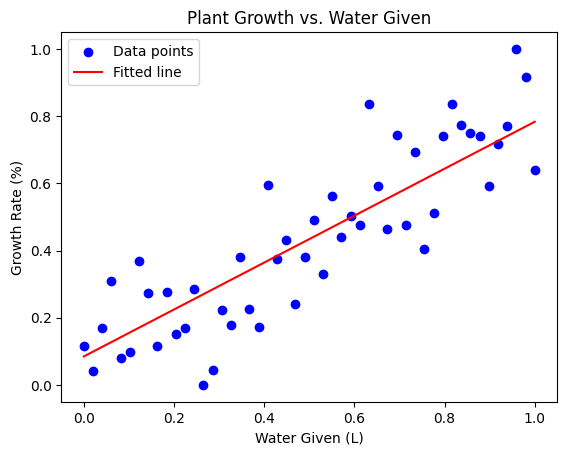

In [ ]:
plt.scatter(x_normalized, y_normalized, color='blue', label='Data points')  # Original data
plt.plot(x_normalized, ŷ_i, color='red', label='Fitted line')  # Regression line
plt.xlabel('Water Given (L)')
plt.ylabel('Growth Rate (%)')
plt.title('Plant Growth vs. Water Given')
plt.legend()
plt.show()

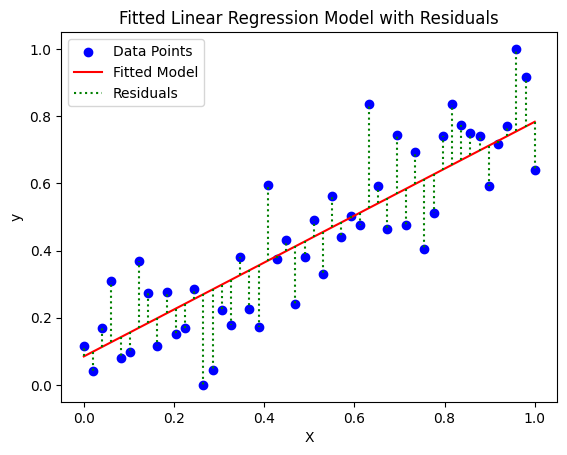

In [ ]:
x_i = x_normalized
y_i = y_normalized
y_pred = ŷ_i
y_hat = ȳ
x_hat = x̄

# Calculate the residuals
residuals = y_i - y_pred

# Plot the data points
plt.scatter(x_i, y_i, color="blue", label="Data Points")  # Original data points

# Plot the fitted regression line
plt.plot(x_i, y_pred, color="red", label="Fitted Model")

# Plot residuals (vertical lines from data points to regression line)
for xi, yi, y_hat in zip(x_i, y_i, y_pred):
    plt.vlines(x=xi, ymin=y_hat, ymax=yi, color="green", linestyle="dotted", label="Residuals" if xi == x_i[0] else "")

# Add labels, title, and legend
plt.xlabel("X")
plt.ylabel("y")
plt.title("Fitted Linear Regression Model with Residuals")
plt.legend()

# Show the plot
plt.show()